## Level 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
dw = 0.1
phi = 0.01

om_v0 = 1

In [32]:
def s(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > 1 and x[i] < 9:
            y[i] = np.pi / (8*om_v0)
        else:
            y[i] = 0
    return y

def H(t):
    if (t > 1) and (t < 9):
        s = np.pi / (8*om_v0)
    else:
        s = 0

    y = -0.5 * om_v0 * s * np.array([[0, np.exp( 1j * (dw*t + phi))], 
                                     [np.exp(-1j * (dw*t + phi)), 0]])
    
    return y


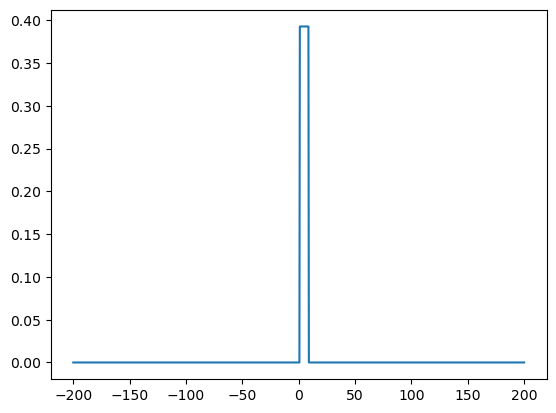

In [33]:
x = np.linspace(-200, 200, 1000)

plt.plot(x, s(x))
plt.show()

In [34]:
for i in range(3):
    print(H(i))

print(H(50))

[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.        +0.j         -0.19203592-0.04093101j]
 [-0.19203592+0.04093101j -0.        +0.j        ]]
[[-0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j]]


In [35]:
T = 10000
dt = 0.001

u0 = np.array([[1, 0], [0, 1]])
print(u0)
print(u0.shape)

[[1 0]
 [0 1]]
(2, 2)


In [36]:
current_u = u0
temp_u = 0
u_list = []

for t in range(T):
    u_list.append(current_u)
    dudt = np.matmul(-1j * H(dt*t), current_u)
    temp_u = current_u + dudt*dt
    current_u = temp_u

In [37]:
print(len(u_list))

for i in range(3):
    print(u_list[i])

10000
[[1 0]
 [0 1]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [38]:
ut = np.array(u_list)
print(ut.shape)

(10000, 2, 2)


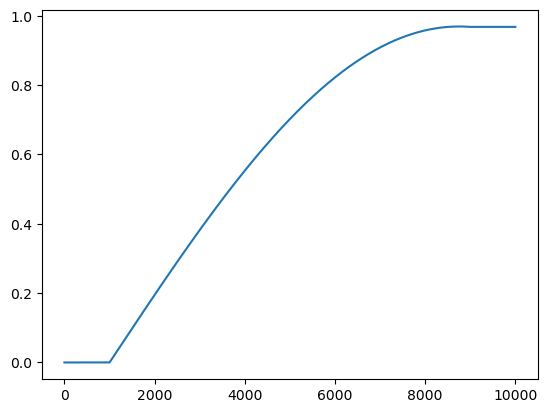

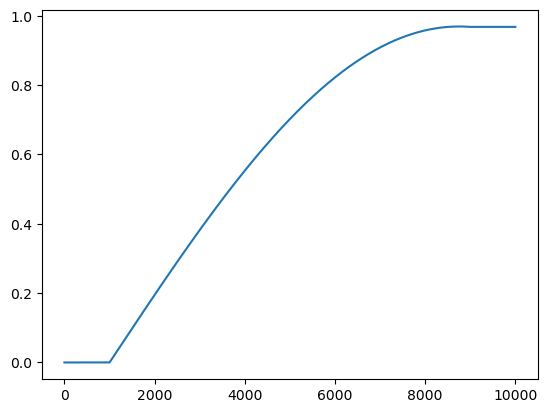

In [39]:
plt.plot(abs(ut[:, 1, 0]))
plt.show()
plt.plot(abs(ut[:, 0, 1]))
plt.show()